<a href="https://colab.research.google.com/github/jugernaut/Prometeo/blob/master/01_Calculo/02_Continuidad/01_Continuidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Continuidad

## Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101019

*   Autores: 
    - José de Jesús Tapia López
    - Luis M. de la Cruz Salas
*   Rev: mar nov 10 13:12:02 CDT 2020

Este sitio puede ser usado libremente, tanto por profesores como por estudiantes, que deseen complementar sus cursos y conocimientos en los temas antes mencionados. Los materiales están bajo una Licencia Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />Esta obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Licencia Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>.

In [ ]:
# COLAB
!git clone https://github.com/jugernaut/Prometeo.git #rama  master
#!git clone --branch desarrollo https://github.com/jugernaut/Prometeo.git #rama desarrollo 
import Prometeo.Utils.gutils as vis

# Linux, MacOS y windows
#import os, sys
#sys.path.insert(0, os.path.abspath('../../'))
#import Utils.gutils as vis

import numpy as np
%matplotlib inline

Cloning into 'Prometeo'...
remote: Enumerating objects: 252, done.
remote: Counting objects: 100% (252/252), done.
remote: Compressing objects: 100% (249/249), done.
remote: Total 2317 (delta 129), reused 0 (delta 0), pack-reused 2065
Receiving objects: 100% (2317/2317), 14.79 MiB | 30.41 MiB/s, done.
Resolving deltas: 100% (1454/1454), done.


## Introducción

Una vez que ya se ha familiarizado con el concepto de función, el siguiente paso es comprender la idea de continuidad, ya que esta idea es parte fundamental del Calculo.

En este documento se muestra da un introducción al concepto de continuidad y se muestran algunos ejemplos.

## Emprendiendo con Chilaquiles 2.0

Una vez terminado el semestre, aquellos estudiantes que emprendieron con la venta de Chilaquiles, decidieron continuar con sus ventas durante el periodo intersemestral vendiendo durante más días a la semana. La tabla de ventas para las diferentes semanas se muestra a continuación:

| Semana | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 |
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
| Porciones vendidas | 4 | 9 | 18 | 30 | 43 | 52 | 57 | 59 | 60 | 60 | 60 | 60 | 132 | 134 | 137 | 141 | 145 | 150 | 157 | 165 | 175 |

Hagamos una gráfica de estos datos:

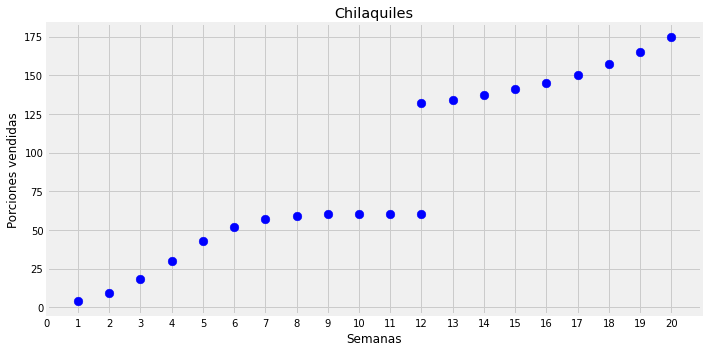

In [ ]:
# lista que contiene el número de la semana en orden ascendente
semanas   = [ 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12, 12, 13, 14, 15, 16, 17, 18, 19, 20]
# lista que contiene el número de porciones conforme al número correspondiente de la semana
porciones = [ 4, 9,18,30,43,52,57,59,60,60,60,60,132, 134, 137, 141, 145, 150, 157, 165, 175]

# parámetros que contendrá la próxima gráfica que vamos a crear y mostrar: 
# el título, la etiqueta del eje X y la etiqueta del eje Y
par = [{'title':'Chilaquiles', 
        'xlabel':'Semanas',
        'ylabel':'Porciones vendidas'}]

# instanciamos una figura que básicamente es el plano cartesiano, colocando
# los parámetros del título y los ejes
graf = vis.planoCartesiano(par=par)
# graficamos en la figura un diagrama de dispersión para mostrar las 
# porciones vendidas de los chilaquiles de la semana correspondiente
graf.scatter(x=semanas, y=porciones,
             par={'color':'blue', 's':75})
#graf.plot(x = [12, 12], y=[0, 175], par={'ls':'--', 'lw':2, 'color':'green'})

# las etiquetas del eje x van a ser los número de cada semana
graf.ticks(xticks = [i for i in range(21)])
# mostramos la figura que contiene la gráfica
graf.show()

Si observas con atención, notarás que en la semana 12 se tienen dos valores: 60 y 132. Esto se nota mejor cuando se traza una línea vertical en esa semana. Para ver esta línea, solo elimina el signo `#` en la línea de código `#graf.plot(...)` de la celda anterior y ejecuta nuevamente. ¿Esta gráfica cumple con la definición de función?

**¿Qué fue lo que pasó con la venta de chilaquiles en la semana 12? ¿Por qué hay dos valores?**

Revisando esta información uno de los estudiantes comenta que él registró el primer valor de 60, debido a que solo tomó en cuenta la venta hasta media semana, que fue cuando terminaron sus exámenes de Cálculo. Pero los otros dos estudiantes, continuaron las ventas hasta el final de esa misma semana y registraron el total de 132 para la misma semana. Obviamente hay un conflicto debido a que se tienen dos valores para la misma semana y eso se observa en la gráfica. Por supuesto es fácil ponerse de acuerdo en este caso y registrar un solo valor, pero tomemos este ejemplo como un caso de estudio de funciones continuas y discontinuas.

Anteriormente habíamos observado que las ventas se podían modelar con una función logística, al menos hasta la semana 12. Ahora tenemos información hasta la semana 20, pero parece que el comportamiento de las ventas es diferente, del tipo exponencial, es decir:

$\displaystyle
f(x) = e^{a \cdot x} + b
$

En este caso, ajustamos los parámetros con los valores: $a=0.2$ y $b=120$

Veamos la siguiente gráfica:

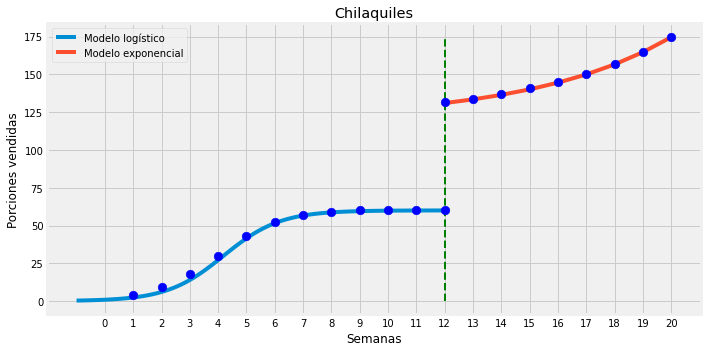

In [ ]:
# creamos la función chiexponenciales que recibe los argumentos a, b y x  y retornamos un número, 
# que es la valuación de la función exponencial de la forma en la que la acabamos de escribir 
def chiexponenciales(a, b, x):
    """
    Función para modelar la venta de chilaquiles con una exponencial.
    """
    return np.exp(a*x)+b

# creamos la función chilogisticos que recibe los argumentos a, b, c y x  y retornamos un número, 
# que es la valuación de la función logística de la forma en la que la acabamos de escribir 
def chilogisticos(a,b,c,x):
    """
    Función para modelar la venta de chilaquiles con una logística.
    """
    return a / (b + np.exp(-1*(x-c)))

# parámetros que contendrá la próxima figura que vamos a crear y mostrar: 
# el título, la etiqueta del eje x y la etiqueta del eje y
par = [{'title':'Chilaquiles', 
        'xlabel':'Semanas',
        'ylabel':'Porciones vendidas'}]

# instanciamos una figura que básicamente es el plano cartesiano, colocando
# los parámetros del título y los ejes
graf = vis.planoCartesiano(par=par)

# Dominio función logísitica: creamos un rango de valores dentro del intervalo 
# cerrado [-1, 12], que va del -1 al 12 con 100 muestras
xl = np.linspace(-1,12,100)         
# Codominio función logísitica: del rango de valores que acabamos de crear, valuamos 
# cada uno en la función chilogisticos, con a = 30, b = 0.5 y c = 3.5
yl = chilogisticos(30,0.5,3.5,xl)  
# graficamos la función del modelo logístico
graf.plot(x=xl, y=yl, par={'label':'Modelo logístico'})

# Dominio función exponencial: creamos un rango de valores dentro del intervalo 
# cerrado [12, 20], que va del 12 al 20 con 9 muestras
xe = np.linspace(12,20,9)     
# Codominio función exponencial: del rango de valores que acabamos de crear, valuamos 
# cada uno en la función chiexponenciales, con a = 0.2 y b = 120
ye=chiexponenciales(0.2, 120, xe)  
# graficamos la función del modelo exponencial
graf.plot(x=xe, y=ye, par={'label':'Modelo exponencial'})
# graficamos en la figura un diagrama de dispersión para mostrar las 
# porciones vendidas de los chilaquiles en la semana correspondiente
graf.scatter(x=semanas, y=porciones, 
             par={'color':'blue', 's':75, 'zorder':5})

# graficamos en la figura una línea vertical punteada de color verde en x = 12
graf.plot(x = [12, 12], y=[0, 175], par={'ls':'--', 'lw':2, 'color':'green'})
# las etiquetas del eje x van a ser los número de cada semana, que van del 0 al 20
# aunque ahí salga un 21, el ciclo for (salvo estipulación de contrario) llega un 
# número antes
graf.ticks(xticks = [i for i in range(21)])
# indicamos que queremos mostrar en la figura la leyenda de las gráficas
graf.legend()
# mostramos la figura que contiene la leyenda, la línea vertical y las gráficas que 
# acabamos de generar
graf.show()

Observamos que efectivamente los modelos logístico y exponencial ajustan muy bien las ventas durante el semestre y durante el periodo intersemestral, respectivamente. Si los estudiantes emprendedores quisieran modelar el comportamiento de las ventas para todas las semanas deberían escribir de manera formal lo siguiente:

$ f(x) = \left\{
\begin{array}{l}
      \frac{30}{0.5 + e^{-(x-3.5)}} & x \leq 12 \\
      \\
      e^{0.2 x} + 120 & x \geq 12 \\
\end{array} 
\right.$

**Algunas conclusiones**:

- La definición de $f(x)$ escrita antes no cumple con la definición de función, pues se tienen dos valores de $f$ para $x=12$:
    - Si caminamos por la gráfica desde la semana 1 hasta la 12, llegaremos al valor de $f(x=12) = 60$. 
    - Pero si caminamos en reversa, empezando en la semana 20, veremos que en la semana 12 obtenemos el valor de $f(x=12) = 132$. 
    - Decimos que hay un **salto** o **discontinuidad** en ese punto y por lo tanto la función completa $f(x)$ no es continua.

- Sin embargo, podemos definir una *función continua a trozos*:
    - Supongamos que los estudiantes acuerdan que la semana 12 pertenece al periodo intersemestral, por lo tanto tenemos:
        - una función del tipo logístico, con un dominio $x \in [0,12)$ y
        - una función del tipo exponencial, con un dominio $x \in [12, 20]$ 
    - de manera formal escribimos:

$ f(x) = \left\{
\begin{array}{l}
      \frac{30}{0.5 + e^{-(x-3.5)}} & x < 12 \qquad \text{(logística hasta la semana 11)} \\
      \\
      e^{0.2 x} + 120 & x \geq 12 \qquad \text{(exponencial a partir de la semana 12)}\\
\end{array} 
\right.$

Observe que en esta definición los dominios no se traslapan, por lo que ahora sí se cumple la definición de función. Veamos la gráfica de este caso:

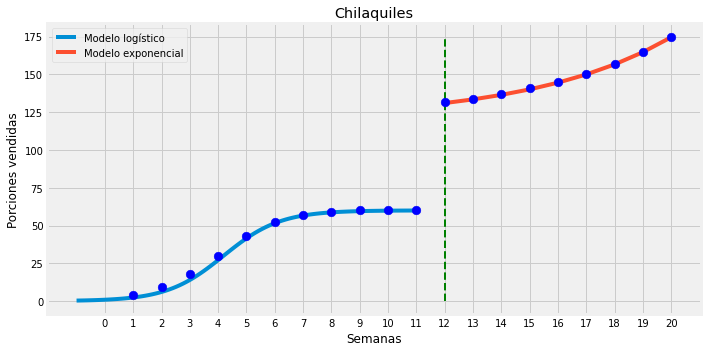

In [ ]:
# Tabla de ventas corregida

# lista que contiene el número de la semana en orden ascendente
semanas   = [ 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12, 13, 14, 15, 16, 17, 18, 19, 20]
# lista que contiene el número de porciones (corregidas) conforme al número correspondiente de la semana
porciones = [ 4, 9,18,30,43,52,57,59,60,60,60,132, 134, 137, 141, 145, 150, 157, 165, 175]

# instanciamos una figura que básicamente es el plano cartesiano, colocando
# los parámetros del título y los ejes previamente establecidos
graf = vis.planoCartesiano(par=par)

# Dominio corregido función logísitica: creamos un rango de valores dentro del intervalo 
# cerrado [-1, 11], que va del -1 al 11 con 100 muestras
xl = np.linspace(-1,11,100)       
# Codominio función logísitica: del rango de valores que acabamos de crear, valuamos 
# cada uno en la función chilogisticos, con a = 30, b = 0.5 y c = 3.5  
yl = chilogisticos(30,0.5,3.5,xl)
# graficamos la función del modelo logístico
graf.plot(x=xl, y=yl, par={'label':'Modelo logístico'})

# Dominio función exponencial: creamos un rango de valores dentro del intervalo 
# cerrado [12, 20], que va del 12 al 20 con 9 muestras
xe = np.linspace(12,20,9)    
# Codominio función exponencial: del rango de valores que acabamos de crear, valuamos 
# cada uno en la función chiexponenciales, con a = 0.2 y b = 120 
ye=chiexponenciales(0.2, 120, xe)  
# graficamos la función del modelo exponencial
graf.plot(x=xe, y=ye, par={'label':'Modelo exponencial'})
# graficamos en la figura un diagrama de dispersión para mostrar las 
# porciones vendidas de los chilaquiles en la semana correspondiente
graf.scatter(x=semanas, y=porciones, 
             par={'color':'blue', 's':75, 'zorder':5})
# graficamos en la figura una línea vertical punteada de color verde en x = 12
graf.plot(x = [12, 12], y=[0, 175], par={'ls':'--', 'lw':2, 'color':'green'})
# las etiquetas del eje x van a ser los número de cada semana, que van del 0 al 20
# aunque ahí salga un 21, el ciclo for (salvo estipulación de contrario) llega un 
# número antes
graf.ticks(xticks = [i for i in range(21)])
# indicamos que queremos mostrar en la figura la leyenda de las gráficas
graf.legend()
# mostramos la figura que contiene la leyenda, la línea vertical y las gráficas que 
# acabamos de generar
graf.show()




A continuación veremos más ejemplos de funciones continuas y discontinuas, así como algunas definiciones más formales.

## Ejemplos y formalismos matemáticos

## Ejemplo 1

Considerese la siguiente función: $f(x) = \frac{1}{x}$.  ¿Qué pasa cuando $x$ está cerca del valor cero?.

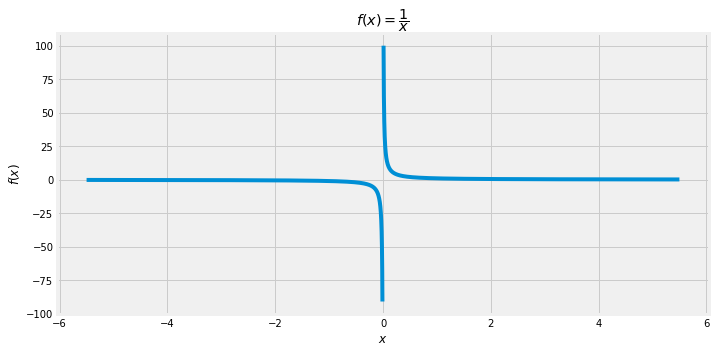

In [ ]:
# Dominio: creamos un rango de valores dentro del intervalo semiabierto [-5.5, 5.5), 
# que va del -5.5 al 5.5 con pasos de 0.001
x = np.arange(-5.5,5.5,0.001)
# Codominio: a los valores generados en el intervalo anterior, les aplicamos la función x  
y = 1/x            

# Los valores del codominio, si son mayores a 100, los hacemos tender a infinito
y[y > 100] = np.inf
# Los valores del codominio, si son menores a -100, los hacemos tender a -infinito
y[y< -100] = -np.inf

# parámetros que contendrá la próxima figura que vamos a crear y mostrar: 
# el título, la etiqueta del eje x y la etiqueta del eje y
par = [{'title':'$f(x) = \dfrac{1}{x}$', 
        'xlabel':'$x$',
        'ylabel':'$f(x)$'}]
        
# instanciamos una figura que básicamente es el plano cartesiano, colocando
# los parámetros del título y los ejes previamente establecidos
graf = vis.planoCartesiano(par=par)
# graficamos la función 1/x 
graf.plot(x=x, y=y)
# mostramos la figura que contiene la gráfica de la función 1/x
graf.show()

**Observaciones**

- Se nota que cuando $x=0$ la función $f(x) =  1/x$ no está definida. 

- Si caminamos por la gráfica, de derecha a izquierda, iniciando por ejemplo en $x=4$, conforme nos acercamos al cero el valor de $f(x)$ se hace muy grande: se dice que *tiende a infinito*; en términos matemáticos escribimos:

$\displaystyle
\lim_{x^+ \rightarrow 0} \frac{1}{x} = \infty
$

- Por otro lado, si ahora caminamos de izquierda a derecha hacia $x = 0$ veremos que $f(x)$ decrece hacia $-\infty$, en términos matemáticos:

$\displaystyle
\lim_{x^- \rightarrow 0} \frac{1}{x} = -\infty
$

- De las dos observaciones anteriores se concluye:

$\displaystyle
\lim_{x^+ \rightarrow 0} \frac{1}{x} \neq \lim_{x^- \rightarrow 0} \frac{1}{x}
$

es decir, el límite por la derecha y el límite por la izquierda no son iguales. Véase el siguiente 
<a href="../03_Limites/01_Limites.ipynb"> notebook</a> para más detalles sobre límites.

- La función $f(x)$ es discontinua en $x=0$ (de hecho, no está bien definida en $x=0$).

## Algunas definiciones

Parece ser anormal ver el comportamiento de las dos funciones anteriores, ya que están desconectadas. Aquellas funciones que no presentan esas 'anormalidades' se les conoce como **funciones continuas**. 

De manera intuitiva, si quisieramos dibujar la gráfica de una función continua usando un lápiz, en principio lo podemos hacer de un solo trazo, sin despegar el lápiz del papel. Este no es el caso de los ejemplos que hemos revisado. 


Supongamos que una función $f(x)$ tiene el valor $y_p$ en $x = p$.Decimos que $f$ es **continua** en $p$, si en cada punto $x$ que está próximo a $p$, el valor de la función $f(x)$ es también próximo a $f(p)$. Pero ¿qué significa en este contexto el término "próximo a"?

Otro modo de expresar la continuidad es como sigue: Si $x$ se mueve hacia $p$, el correspondiente valor de la función $f(x)$ debe llegar a ser tan próximo a $f(p)$ como se desee, cualquiera que sea la forma con que $x$ se acerque a $p$. En los valores de una función continua no se presentan saltos bruscos.

Por lo tanto, podemos definir:

Una función $f$ es **continua** en un punto $p$ si y sólo si:

1. $\displaystyle \lim_{x \to p}f(x)=f(p)$
2. $f$ está definida en $p$

Más formalmente: 

***
Una función $f$ es **continua** en $p$ si para todo $\epsilon > 0$ existe un $\delta > 0$ tal que $|f(x)-f(p)| < \epsilon$
siempre que $0 < |x - p| < \delta$.
***

Cheque el siguiente interactivo para entender un poco acerca de $\epsilon$ y $\delta$: 

In [ ]:
# Linux, MacOS y Windows
#%run "./zDerivadas_interactive_02.ipynb"

# Google Coolab
%run "/content/Prometeo/01_Calculo/02_Continuidad/zContinuidad_interactive_01.ipynb"

fatal: destination path 'Prometeo' already exists and is not an empty directory.


interactive(children=(FloatSlider(value=2.5, description='x0', max=4.5, min=0.5, step=0.5), FloatSlider(value=…

<function __main__.continuidad>

## Ejemplo 2

Sea $f(x) = x^2$. Vamos a demostrar formalmente que $f$ es continua en $x=1$:
 
Primero notemos que $f$ está definida en $x=1$, pues como mencionamos anteriormente, asumimos que, salvo especificar lo contrario, nuestras funciones tendrían tanto dominio como contradominio al conjunto $\mathbb{R}$; y entonces $f(1) = 1^2=1$. Ahora bien, para probar la continuidad de $f$ en $x=1$, usando la definición tenemos que demostrar que $\lim_{x \to p}f(x)=f(p)$.

P.D. Para todo $\epsilon>0$ existe $\delta>0$ tal que si $0 < |x - 1|< \delta $, entonces $|x^2-1|<\epsilon$. Encontrar $\delta$ se logra más fácilmente trabajando hacia atrás. Manipulemos la segunda desigualdad que involucra a $\delta$ hasta que contenga un término de la forma $x-1$ como en la primera desigualdad:

$|x^2-1|=|x+1||x-1|$.

En lo anterior, hay un factor no deseado de $|x+1|$, que debe limitarse. Si nos aseguramos de que $\delta < 1$, entonces $|x-1| < \delta < 1$. Luego:

$|x-1| < \delta \Rightarrow |x-1| < 1 \Rightarrow -1 < x-1 < 1$. 

Sumando un 2 a todos los lados de la desigualdad anterior, obtenemos que:

$1 < x+1 < 3 \Rightarrow |x+1| < 3$. 

Por lo tanto, si $|x^2-1|=|x+1||x-1|< 3|x-1|<\epsilon \Rightarrow |x-1|< \frac{\epsilon}{3}$

Entonces, seleccionamos  $\delta=min\{1,\frac{\epsilon}{3}\}$.

Checamos: Dada $\epsilon>0$, sea $\delta=min\{1,\frac{\epsilon}{3}\}$. Entonces $0<|x-1|<\delta$ implica que 
$|x^2-1|=|x+1||x-1|< 3 |x-1| < 3 \delta \leq 3\frac{\epsilon}{3}=\epsilon$.

$\therefore$ $\lim_{x \to 1}x^2=1=1^2$, lo cual quiere decir que $f$ es continua en $x=1$.

Veamos la gráfica de la función y la evaluación del punto en cuestión:

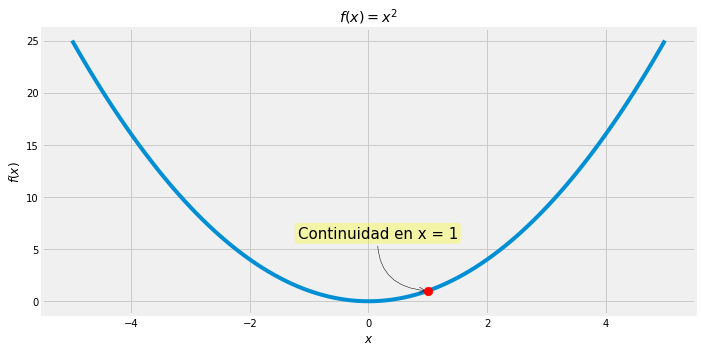

In [ ]:
# Dominio: creamos un rango de valores dentro del intervalo semiabierto [-5, 5.1), 
# que va del -5 al 5.1 con pasos de 0.1
x4 = np.arange(-5, 5.1, 0.1) 
# Codominio: a los valores generados en el intervalo anterior, los elevamos al cuadrado
y4 = [i**2 for i in x4]

# parámetros que contendrá la próxima figura que vamos a crear y mostrar: 
# el título, la etiqueta del eje x y la etiqueta del eje y
par = [{'title':'$f(x) = x^2$', 
        'xlabel':'$x$',
        'ylabel':'$f(x)$'}]

# instanciamos una figura que básicamente es el plano cartesiano, colocando
# los parámetros del título y los ejes previamente establecidos
graf = vis.planoCartesiano(par=par)
# graficamos la función x^2
graf.plot(x=x4,y=y4)
# graficamos en la figura un punto rojo en el (1,1)
graf.scatter(x=[1.],y=[1.],par={'c':'red','marker':'o','s':75, 'zorder':5})
# Hacemos algunas anotaciones sobre el punto rojo
graf.annotate(par={'text':'Continuidad en x = 1', 'xy':(1, 1), 'xytext':(-50,50), 'fontsize':15,
            'textcoords':'offset points', 'ha':'center', 'va':'bottom',
            'bbox':{'boxstyle':'round','pad':0.2, 'fc':'yellow', 'alpha':0.3},
            'arrowprops':{'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 
                           'color':'black'}})
# mostramos la figura que contiene la gráfica, el punto rojo y las anotaciones a la gráfica
graf.show()

## Revisión de algunos Teoremas






### Teorema: Operaciones básicas entre funciones continuas

Sean $f$ y $g$ dos funciones continuas, es decir, son tales que $\lim_{x \to p}f(x)=f(p)$ y $\lim_{x \to p}g(x)=g(p)$. Se tiene entonces

1. Si $f$ es una función constante $k$, se cumple que $\lim_{x \to p}f(x) =\lim_{x \to p}k = k = f(p)$
2. $\lim_{x \to p}f(x) + g(x) = f(p)+g(p)$.
3. $\lim_{x \to p}f(x) - g(x) = f(p)-g(p)$.
4. $\lim_{x \to p}f(x) \cdot g(x) = f(p) \cdot g(p)$.
5. Si $g(p) \neq 0$, se cumple que $\lim_{x \to p}\frac{f(x)}{g(x)} = \frac{f(p)}{g(p)}$.


### Teorema: Composición de funciones continuas 

Sean $f$ y $g$ dos funciones continuas en $g(p)$ y en $p$ respectivamente. Se tiene entonces que $ f \circ g$ es continua en $p$. Nótese que se requiere que $f$ sea continua en $g(p)$, pero no necesariamente tiene que serlo en $p$.

### Teorema: Continuidad en un intervalo cerrado

Los teoremas mostrados en este notebook se refieren a continuidad de funciones en un punto, pero el concepto de continuidad no empieza a ser interesante hasta que dirigimos nuestra atención a funciones que son continuas en todos los puntos de un intervalo. Sea $f$ continua en $x$, para todo $x$ en $(a,b)$, entonces se dice que $f$ es continua en $(a,b)$. La continuidad en un intervalo cerrado se define de modo más peculiar:

Una función $f$ se dice que es continua en $[a,b]$ si y sólo si:

1. $f$ es continua en $x$ para todo $x$ en $(a,b)$, y
2. $\lim_{x \to p^+}f(x) = f(p)$ y $\lim_{x \to p^-}f(x) = f(p)$


### Teorema de vencidades de una función continua

Sea $f$ una función continua en $a$, y $f(a) \gt 0$. Entonces existe un número $\delta \gt 0$ tal que $f(x)\gt 0$ para todo $x$ que satisface $|x-a| \lt \delta$. Análogamente, si $f(a) \lt 0$, entonces existe un número $\delta \gt 0$ tal que $f(x) \lt 0$ para todo $x$ que satisface $|x-a| \lt \delta$.

### Teorema de intercalación 

Sea $I$ un intervalo que contiene al punto $p$ y sean $f, g$ y $h$ funciones continuas en $I$. Supongamos que para todo $x$ en $I$ y diferente de $p$, tenemos: $g(x)\leq f(x)\leq h(x)$; y supongamos también que: $g(p)=\lim _{x \to p}g(x)=\lim _{x\to p}h(x)=h(p)$. Entonces: $\lim _{x\to p}f(x)=f(p)=g(p)=h(p)$

### Primer Teorema Fuerte (del valor intermedio) 

Si $f$ es continua en $[a,b]$ y $f(a) \lt c \lt f(b)$, entonces existe algún $x \in [a,b]$ tal que $f(x) = c$.

Esto quiere decir que la gráfica de una función continua que empieza por debajo de la recta constante $y=c$ y termina por encima de esta, debe cruzar en algún punto a dicha recta.


Podemos generalizar este teorema al siguiente teorema:

### Teorema de los valores intermedios 
Sea $f$ una función continua en $[a,b]$. Si $c$ y $d$ están en $[a,b]$, entonces $f$ toma todos los valores comprendidos entre $f(c)$ y $f(d)$.

### Ejemplo 3

Demostrar que la función: $f(x) = x^3 - x^2 + x + 1$ tiene una raíz en el intervalo $[-1,1]$.

Para eso vamos a aplicar el teorema del valor intermedio:
- Dado que la función polinomial es continua en todo el conjunto de los números reales, hacemos $a = -1$ y $b = 1$ y evaluamos la función en esos puntos:

$f(-1) = (-1)^3 - (-1)^2 + (-1) + 1 = -2 < 0$ 

$f(1) = (1)^3 - (1)^2 + (1) + 1 = 2 > 0$

Por lo que satisface con la condición de que $f(a) \leq k \leq f(b)$. Entonces, por la continuidad de la función, debe existir un número $x_0$ en el intervalo $[a,b]$ tal que $f(x_0) = 0$. Esto significa que $f(x)$ tiene una raíz en $[-1,1]$

A continuación mostramos la gráfica de esta función. 

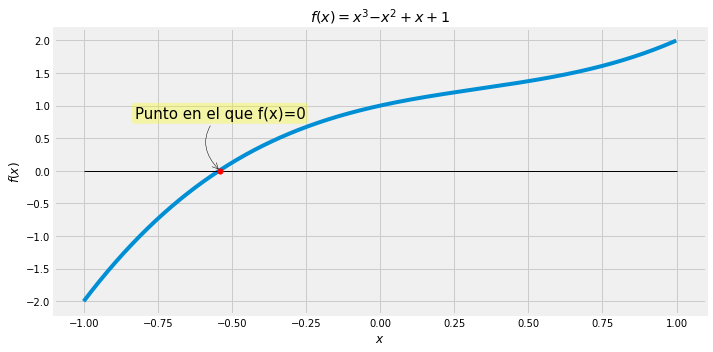

In [ ]:
# Dominio: creamos un rango de valores dentro del intervalo semiabierto [-1, 1), 
# que va del -1 al 1 con pasos de 0.001
x10 = np.arange(-1, 1, 0.001) 
# Codominio: los valores generados en el intervalo anterior, los valuamos en la 
# función x^3-x^2+x+1
y10 = [x**3-x**2+x+1 for x in x10]

# parámetros que contendrá la próxima figura que vamos a crear y mostrar: 
# el título, la etiqueta del eje x y la etiqueta del eje y
par = [{'title':'$f(x) = x^3−x^2+x+1$', 
        'xlabel':'$x$',
        'ylabel':'$f(x)$'}]

# instanciamos una figura que básicamente es el plano cartesiano, colocando
# los parámetros del título y los ejes previamente establecidos
graf = vis.planoCartesiano(par=par)
# graficamos la función x^3-x^2+x+1
graf.plot(x=x10,y=y10)
# graficamos en la figura un punto rojo en el (-0.54,0)
graf.scatter(x=[-0.54],y=[0.],par={'c':'r','marker':'o','s':30, 'zorder':5})
# Hacemos algunas anotaciones sobre el punto rojo
graf.annotate(par={'text':'Punto en el que f(x)=0', 'xy':(-0.54, 0), 'xytext':(0,50), 'fontsize':15,
            'textcoords':'offset points', 'ha':'center', 'va':'bottom',
            'bbox':{'boxstyle':'round','pad':0.2, 'fc':'yellow', 'alpha':0.3},
            'arrowprops':{'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 
                            'color':'black'}})

# graficamos una línea horizontal negra en y=0 
graf.plot(x = [-1, 1], y = [0, 0], par={'ls':'-', 'lw':1, 'color':'black'})
# mostramos la figura que contiene la gráfica, las anotaciones a la gráfica, 
# la línea vertical y el punto rojo
graf.show()
                 

**Ejercicio** ¿Es posible encontrar el $x_0$ que satisface: $f(x_0) = 0$? En caso afirmativo, indique cómo. En caso negativo, explique el porqué.

### Segundo Teorema Fuerte
 Si $f$ es continua en $[a,b]$ entonces existen números $N_1,N_2$ tales que $N_1 \le f(x) \le N_2$, para toda $x$ en $[a,b]$. Esto es, $f$ está acotada superiormente e inferiormente en $[a,b]$. Más aún, podemos decir que existe un número $N$ tal que $|f(x)|\leq N$, para todo $x$ en $[a,b]$, es decir, podemos tomar a $N = max\{|N_1|,|N_2|\}$

Esto quiere decir que la gráfica de una función continua queda por debajo y por arriba de algunas rectas paralelas al eje $X$.



### Ejemplo 4

Usando la función del ejemplo anterior, vimos que $f(-1) =-2$ y $f(1)=2$. Por lo tanto, podemos proponer cualquier número $N$ mayor a dos, digamos $N=3$, de tal forma que dicha función esté acotada inferior y superiormente en $[-1,1]$.

Lo podemos visualizar en la siguiente figura:


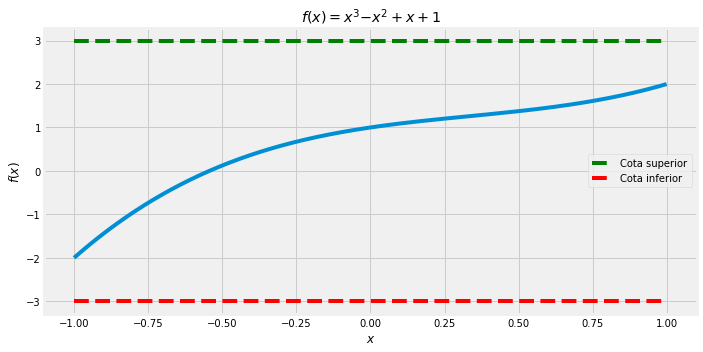

In [ ]:
# parámetros que contendrá la próxima figura que vamos a crear y mostrar: 
# el título, la etiqueta del eje x y la etiqueta del eje y
par = [{'title':'$f(x) = x^3−x^2+x+1$', 
        'xlabel':'$x$',
        'ylabel':'$f(x)$'}]
# instanciamos una figura que básicamente es el plano cartesiano, colocando
# los parámetros del título y los ejes previamente establecidos
graf = vis.planoCartesiano(par=par)
# graficamos en la figura una línea horizontal punteada de color verde en y = 3
graf.plot(x=[-1,1],y = [3,3], par = {'c':'green','linestyle':'--','label' : 'Cota superior'})
# graficamos en la figura una línea horizontal punteada de color rojo en y = -3
graf.plot(x=[-1,1],y = [-3,-3], par = {'c':'red','linestyle':'--','label' : 'Cota inferior'})
# graficamos la función x^3-x^2+x+1
graf.plot(x=x10,y=y10)
# indicamos que queremos mostrar en la figura la leyenda de las rectas horizontales punteadas
graf.legend()
# mostramos la figura que contiene la leyenda, las líneas horizontales y la gráfica de la
# función x^3-x^2+x+1
graf.show()

### Tercer Teorema Fuerte (de los valores extremos)

Si $f$ es continua en $[a,b]$ entonces existen números $y,z$ en $[a,b]$ tal que $f(y) \le f(x) \le f(z)$ para toda $x$ en $[a,b]$. 

Esto quiere decir que una función continua en un intervalo cerrado alcanza su mínimo y su máximo en dicho intervalo.


### Ejemplo 5 

Una vez más, consideremos la función $f(x) = -x^3 + x^2 + x + 1$ en el intervalo $[-0.5,0.5]$. Esta función es polinomial por lo que es continua en todos los reales. Por el teorema anterior, $f(x)$ alcanza un máximo y un mínimo en dicho intervalo. 

Para encontrar el máximo y mínimo en el intervalo seguimos los siguientes pasos:
- Calculamos la derivada de $f(x)$: $f^\prime(x) = -3x^2 + 2x + 1$  
- Igualamos a cero la derivada e intentamos encontrar la $x$ que satisface la igualdad: $-3x^2 + 2x + 1 = 0 $ 
- En este caso las raíces son $\displaystyle x_1 = -1/3$ y $\displaystyle x_2 = 1$. Solo $x_1$ cae en el intervalo de interés. La raíz $x_2$ la desechamos.
- Evaluamos en $x_1$: $\displaystyle f(x_1 = -1/3) = 0.815$.
- Verificamos los puntos extremos. 
    + $f(x = -0.5) = 0.875$
    + $f(x = 0.5) = 1.625$. 
- Comparando $f(-0.5)$, $f(0.5)$ y $f(x_1)$ observamos que el mínimo es $f(x_1) = 0.815$ y el máximo es $f(0.5) = 1.625$.

Lo anterior se verifica en la siguiente gráfica:

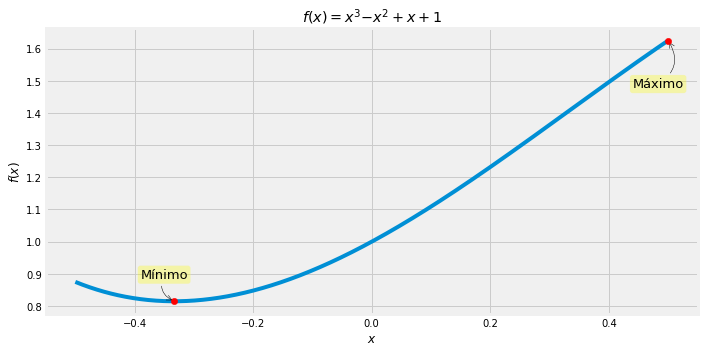

In [ ]:
# Dominio: creamos un rango de valores dentro del intervalo semiabierto [-0.5, 0.5), 
# que va del -0.5 al 0.5 con pasos de 0.001
x11 = np.arange(-0.5, 0.5, 0.001) 

# Codominio: a los valores generados en el intervalo anterior, los valuamos en la 
# función x^3-x^2+x+1
y10 = [x**3-x**2+x+1 for x in x10]
y11 = [-x**3+x**2+x+1 for x in x11]

# parámetros que contendrá la próxima figura que vamos a crear y mostrar: 
# el título, la etiqueta del eje x y la etiqueta del eje y
par = [{'title':'$f(x) = x^3−x^2+x+1$', 
        'xlabel':'$x$',
        'ylabel':'$f(x)$'}]

# instanciamos una figura que básicamente es el plano cartesiano, colocando
# los parámetros del título y los ejes previamente establecidos
graf = vis.planoCartesiano(par=par)
# graficamos la función x^3-x^2+x+1
graf.plot(x=x11,y=y11)
# graficamos en la figura un punto rojo en el (0.5,1.625)
graf.scatter(x=[0.5],y=[1.625],par={'c':'red','marker':'o','s':40, 'zorder':5})
# graficamos en la figura un punto rojo en el (-1/3,0.815)
graf.scatter(x=[-1/3],y=[0.815],par={'c':'red','marker':'o','s':40, 'zorder':5})
# Hacemos algunas anotaciones sobre el punto rojo que indica el máximo
graf.annotate(par={'text':'Máximo', 'xy':(0.5, 1.625), 'xytext':(-10,-50), 'fontsize':13,
            'textcoords':'offset points', 'ha':'center', 'va':'bottom',
            'bbox':{'boxstyle':'round','pad':0.2, 'fc':'yellow', 'alpha':0.3},
            'arrowprops': {'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 
                            'color':'black'}})

# Hacemos algunas anotaciones sobre el punto rojo que indica el mínimo
graf.annotate(par={'text':'Mínimo', 'xy':(-1/3, 0.815), 'xytext':(-10,20), 'fontsize':13,
            'textcoords':'offset points', 'ha':'center', 'va':'bottom',
            'bbox':{'boxstyle':'round','pad':0.2, 'fc':'yellow', 'alpha':0.3},
            'arrowprops': {'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 
                            'color':'black'}})

# mostramos la figura que contiene la gráfica de la función x^3-x^2+x+1, los puntos
# rojos y las anotaciones sobre esos puntos
graf.show()

## Ejemplo 6: aplicación


Suponga que un vendedor recibe un salario de acuerdo con un contrato que establece una relación entre el pago y el nivel de ventas realizadas por el vendedor. En particular, suponga que el contrato estipula que el salario mensual del vendedor estará compuesto de tres partes: 

$(i)$ una cantidad básica de $\$800$, 

$(ii)$ una comisión del $10\%$ sobre las ventas, y

$(iii)$ un bono de $\$500$ si las ventas del mes llegan los $\$20,000$ o más. 

Si $S$ representa las ventas por mes y $P$ representa el salario del vendedor por el mes, es posible escribir una relación salario-ventas como sigue:

$   P(S) = \left\{
\begin{array}{l}
      \$800+0.1\cdot S & S<\$20.000 \\
      \
      \\
      \$1,300+0.1\cdot S & S \ge \$20.000. \\
\end{array} 
\right.$

La gráfica de esta función es la siguiente:

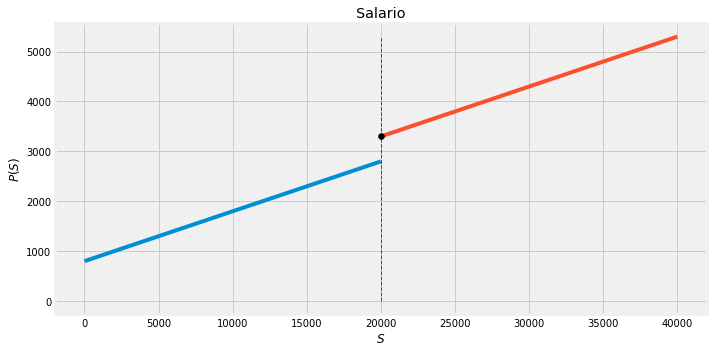

In [ ]:
# Dominio 1: creamos un rango de valores dentro del intervalo semiabierto [0, 20000), 
# que va del 0 al 20000 con pasos de 10
s1 = np.arange(0., 20000., 10)
# Dominio 2: creamos un rango de valores dentro del intervalo semiabierto [20000,40000), 
# que va del 20000 al 40000 con pasos de 10
s2 = np.arange(20000., 40000., 10)

# Codominio 1: a los valores generados en el primer intervalo, los valuamos en la 
# primera función de la función a trozos P(S)
p1 = [800 + 0.1 * S for S in s1]
# Codominio 2: a los valores generados en el segundo intervalo, los valuamos en la 
# segundo función de la función a trozos P(S)
p2 = [1300 + 0.1 * S for S in s2]

# parámetros que contendrá la próxima figura que vamos a crear y mostrar: 
# el título, la etiqueta del eje x y la etiqueta del eje y
par = [{'title':'Salario', 
        'xlabel':'$S$',
        'ylabel':'$P(S)$'}]
# instanciamos una figura que básicamente es el plano cartesiano, colocando
# los parámetros del título y los ejes previamente establecidos
graf = vis.planoCartesiano(par=par)

# graficamos la primera función de la función a trozos P(S)
graf.plot(x=s1, y=p1)
# graficamos la segunda función de la función a trozos P(S)
graf.plot(x=s2, y=p2)
# graficamos un punto negro en la discontinuidad de la función, es decir, 
# en el primer elemento del dominio 2
graf.scatter(x=s2[0], y=p2[0],
            par = {'color':'black', 'zorder':5})
# graficamos una línea verde vertical punteada en x = 20000
graf.plot(x=[20000,20000],y=[0,5300],
          par={'ls':"--", 'lw':'1', 'color':'green'})
# mostramos la figura que contiene la gráfica de la función P(S), el punto negro
# y la línea vertical
graf.show()

**Observaciones**:

El hecho de que el bono de $\$500$ se logre una vez que $S$ alcanza el valor crítico de $\$20,000$ conduce al resultado de que el límite izquierdo de la función salarial en $S = \$20,000$ es de $\$2,800$. Mientras que el límite derecho es de $\$3,300$. Es decir, hay una discontinuidad.

La existencia de esta discontinuidad tiene implicaciones económicas interesantes. Considere el siguiente escenario: Hay tres vendedores, llamados $A$, $B$ y $C$. Sus ventas acumuladas para el mes, sin incluir el último día, son $\$26,000$ para $A$, $\$18,500$ para $B$ y $\$6,000$ para $C$. Si no vendieran nada más, su salario sería como se ve en la siguiente gráfica:

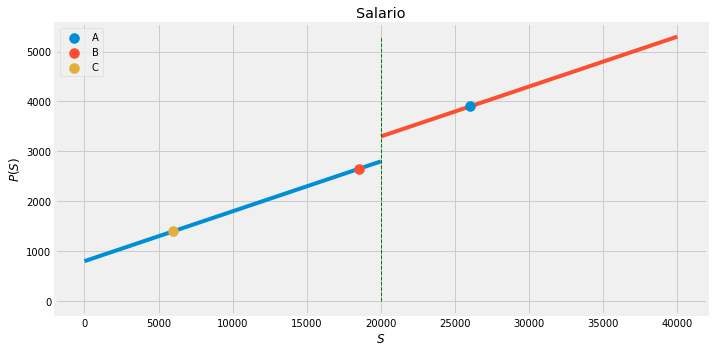

In [ ]:
# instanciamos una figura que básicamente es el plano cartesiano, colocando
# los parámetros del título y los ejes previamente establecidos
graf = vis.planoCartesiano(par=par)

# valor del dominio, lo que vale A
SA = 26000
# valor del dominio, lo que vale B
SB = 18500
# valor del dominio, lo que vale C
SC = 6000
# valuamos A en la función a trozos (en la segunda función, pues A es mayor o igual a 20000)
PA = 1300 + 0.1 * SA 
# valuamos B en la función a trozos (en la primera función, pues B es menor a 20000)
PB = 800 + 0.1 * SB 
# valuamos C en la función a trozos (en la primera función, pues C es menor a 20000)
PC = 800 + 0.1 * SC

# graficamos la primera función de la función a trozos P(S)
graf.plot(x=s1, y=p1)
# graficamos la segunda función de la función a trozos P(S)
graf.plot(x=s2, y=p2)

# graficamos un punto en la función valuada en A, 
graf.scatter(x=SA, y=PA,
            par = {'label':'A', 'zorder':5, 's':100})
# graficamos un punto en la función valuada en B, 
graf.scatter(x=SB, y=PB,
            par = {'label':'B', 'zorder':5, 's':100})
# graficamos un punto en la función valuada en C, 
graf.scatter(x=SC, y=PC,
            par = {'label':'C', 'zorder':5, 's':100})
# graficamos una línea verde vertical punteada en x = 20000
graf.plot(x=[20000,20000],y=[0,5300],
          par={'ls':"--", 'lw':'1', 'color':'green'})
# mostramos la leyenda, que contiene a los puntos A, B y C
graf.legend()
# mostramos la figura que contiene a la gráfica de la función P(S), la línea
# vertical y los tres puntos
graf.show()

La comisión del $10\%$ sobre las ventas le dará a cada uno un incentivo similar para realizar ventas adicionales el último día del mes. 

¿Pero la posibilidad del bono de $\$500$ tendrá un efecto diferente en los tres vendedores? 

Asumiendo que es posible generar ventas por valor de unos pocos miles de pesos en un día, pero es prácticamente imposible crear más de $\$10,000$ en ventas, uno esperaría que el vendedor $B$ se esforzará más el último día para aumentar las ventas que los otros dos y así superar el valor crítico de $\$2000$ para obtener el bono extra.

#Evalúa tus conocimientos

Si deseas contestar un breve cuestionario en el que podrás evaluar un poco del conocimiento aquirido en este notebook da clic [aquí.](https://forms.gle/g2aXMeB7LMiLQQ5U6)

## Referencias

* Spivak, M., & Marqués, B. F. (1988). Cálculo Infinitesimal. Reverté.
* Apostol, T. M. (2001). Calculus Volumen I (Segunda edicion). Editorial Reverté.
* Hoy, M., Livernois, J., Mckenna, C., Rees, R., & Stengos, T. (2011). Mathematics for Economics, Third edition. MIT Press.